In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import datetime
import seaborn               as sns

#for word count
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import datetime

read Builtwith data

In [2]:
shopify =pd.read_csv('All-Live-Shopify-Sites_0601.csv',encoding='ISO 8859-1',header=1)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
shopify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302297 entries, 0 to 2302296
Data columns (total 34 columns):
Domain               object
Location on Site     object
Tech Spend USD       object
Sales Revenue USD    object
Company              object
Vertical             object
Tranco               object
Page Rank            object
Majestic             object
Umbrella             object
Telephones           object
Emails               object
Twitter              object
Facebook             object
LinkedIn             object
Google               object
Pinterest            object
GitHub               object
Instagram            object
Vk                   object
Vimeo                object
Youtube              object
TikTok               object
People               object
City                 object
State                object
Zip                  object
Country              object
First Detected       object
Last Found           object
First Indexed        object
Last Indexed       

In [4]:
shopify_cn = shopify[shopify['Country']=='CN']

In [5]:
shopify_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1100 to 2298903
Data columns (total 34 columns):
Domain               733 non-null object
Location on Site     733 non-null object
Tech Spend USD       733 non-null object
Sales Revenue USD    700 non-null object
Company              369 non-null object
Vertical             493 non-null object
Tranco               733 non-null object
Page Rank            733 non-null object
Majestic             733 non-null object
Umbrella             733 non-null object
Telephones           728 non-null object
Emails               243 non-null object
Twitter              93 non-null object
Facebook             235 non-null object
LinkedIn             16 non-null object
Google               0 non-null object
Pinterest            45 non-null object
GitHub               1 non-null object
Instagram            211 non-null object
Vk                   3 non-null object
Vimeo                0 non-null object
Youtube              15 non-null objec

In [6]:
shopify.head(100)

,Domain,Location on Site,Tech Spend USD,Sales Revenue USD,Company,Vertical,Tranco,Page Rank,Majestic,Umbrella,...,City,State,Zip,Country,First Detected,Last Found,First Indexed,Last Indexed,Exclusion,Compliance
0,babbel.com,pt.business.babbel.com;de.business.babbel.com;...,$5000,NaN,Babbel,Education,4587,10444,5449,26267,...,Palo Alto,CA,94304,US,2018-04-02,2021-05-24,2011-09-11,2021-05-30,-,GDPR Germany
1,babson.edu,explearn.babson.edu,$10000,NaN,Babson College,Education,36343,7816,5578,117975,...,Babson Park,MA,02457,US,2020-02-14,2021-05-06,2011-01-03,2021-05-30,-,-
2,barstoolsports.com,store.barstoolsports.com,$5000,NaN,Barstool Sports Inc,Sports,461490,17224,15220,14446,...,New York City,NY,NaN,US,2014-11-23,2021-05-27,2011-01-03,2021-05-27,-,-
3,bbc.com,shop.bbc.com;us.shop.bbc.com;ca.shop.bbc.com;d...,$10000,NaN,British Broadcasting Corporation,Business And Industrial,460626,101,59,2128,...,Greater London,UK,W1A,GB,2019-09-19,2021-05-30,2011-01-03,2021-05-31,-,GDPR United Kingdom
4,bedbathandbeyond.com,thekitchen.bedbathandbeyond.com,$10000,$6473174,Bed Bath & Beyond Inc,Hobbies And Interests,1522,10895,3429,8690,...,Canandaigua,NY,14424,US,2018-10-01,2021-04-12,2002-03-26,2021-05-30,-,-
5,benzinga.com,swag.benzinga.com,$10000,NaN,Numerex Corp,Business And Industrial,973,781,2412,14803,...,Detroit,MI,48226,US,2021-02-16,2021-04-20,2009-08-25,2021-05-31,-,-
6,bet.com,store.bet.com,$10000,$8643584,BET Interactive LLC,Art And Entertainment,1907,5336,4645,54474,...,New York,NY,10036,US,2020-11-10,2021-05-27,2011-01-03,2021-05-31,-,-
7,bethesda.net,gear.bethesda.net,$10000,$238014,Bethesda Softworks LLC,Education,2596,6815,3494,13706,...,Rockville,MD,NaN,US,2018-05-02,2021-05-30,2002-01-19,2021-05-31,-,-
8,betterment.com,shop.betterment.com,$10000,$84634,Betterment,Finance,6755,11511,22157,40263,...,Dallas,TX,75320,US,2020-01-02,2021-05-27,2011-09-04,2021-05-30,-,-
9,biggerpockets.com,store.biggerpockets.com,$5000,$329838,BiggerPockets,Finance,3098,8621,6624,82108,...,Denver,CO,80206,US,2020-11-23,2021-05-27,2003-09-03,2021-05-30,-,-


check verticals

In [7]:
shopify['Vertical'].unique()

array(['Education', 'Sports', 'Business And Industrial',
       'Hobbies And Interests', 'Art And Entertainment', 'Finance',
       'Technology And Computing', 'Shopping', 'Health And Fitness',
       'Law  Govt And Politics', 'Automotive And Vehicles', 'Science',
       'Travel', 'Style And Fashion', 'Real Estate', nan, 'Society',
       'Family And Parenting', 'Home And Garden', 'Careers',
       'Food And Drink', 'Adult', 'Pets', 'Religion And Spirituality',
       'News'], dtype=object)

# Data Cleaning and Classification

In [8]:
def int_sales(s):
    if str(s) == 'nan':
        return 0
    else:
        s1= s.replace('$','')
        s2 = int(s1.replace(',',''))
        return s2

def txt2int(s):
    if s == 'Outside Top 1m':
        return 1000001
    elif s == 'Outside Top 100m':
        return 100000001
    
    else:
        return int(s)

def sales_lv(s):
    if 0 < s <= 5000:
        return 0
    elif 5000 < s <= 10000:
        return 1
    elif 10000 < s <= 50000:
        return 2
    elif 50000 < s <= 100000:
        return 3
    elif 100000 < s <= 500000:
        return 4
    elif 500000 < s <= 1000000:
        return 5
    elif 1000000 < s <= 5000000:
        return 6
    elif 5000000 < s <= 10000000:
        return 7
    else:
        return 8
    
shopify['Sales Revenue'] = shopify['Sales Revenue USD'].apply(int_sales)
shopify['Tech Spend'] = shopify['Tech Spend USD'].apply(int_sales)
for i in shopify.columns[6:10]:
    shopify[i] = shopify[i].apply(txt2int)
shopify['Sales Level'] = shopify['Sales Revenue'].apply(sales_lv)

In [9]:
shopify['Tranco'].unique()

array([  4587,  36343, 461490, ..., 915279, 911243, 911262], dtype=int64)

In [10]:
shopify[shopify['Sales Revenue']>0].corr()['Sales Revenue']

Tranco          -0.147580
Page Rank       -0.101421
Majestic        -0.173928
Umbrella        -0.134121
Sales Revenue    1.000000
Tech Spend       0.419131
Sales Level      0.257120
Name: Sales Revenue, dtype: float64

In [11]:
shopify = shopify[shopify['Sales Revenue']>0]

In [12]:
shopify[shopify['Sales Level']>=6]

,Domain,Location on Site,Tech Spend USD,Sales Revenue USD,Company,Vertical,Tranco,Page Rank,Majestic,Umbrella,...,Country,First Detected,Last Found,First Indexed,Last Indexed,Exclusion,Compliance,Sales Revenue,Tech Spend,Sales Level
4,bedbathandbeyond.com,thekitchen.bedbathandbeyond.com,$10000,$6473174,Bed Bath & Beyond Inc,Hobbies And Interests,1522,10895,3429,8690,...,US,2018-10-01,2021-04-12,2002-03-26,2021-05-30,-,-,6473174,10000,7
6,bet.com,store.bet.com,$10000,$8643584,BET Interactive LLC,Art And Entertainment,1907,5336,4645,54474,...,US,2020-11-10,2021-05-27,2011-01-03,2021-05-31,-,-,8643584,10000,7
15,bl.uk,shop.bl.uk;prints.bl.uk,$2000,$2260728,NaN,Business And Industrial,8608,2169,1695,55303,...,GB,2018-08-05,2021-05-27,2003-01-29,2021-05-30,-,GDPR United Kingdom,2260728,2000,6
20,boots.com,bn.boots.com;ae.boots.com;qt.boots.com;kw.boot...,$10000,$8887491,The Boots Company PLC,Health And Fitness,18558,9852,4001,47205,...,GB,2020-09-02,2021-03-02,2000-03-01,2021-05-30,-,GDPR United Kingdom,8887491,10000,7
38,carnival.com,shop.carnival.com,$10000,$2856967,Carnival Corporation,Travel,1110,5310,8626,71761,...,US,2019-08-02,2021-04-20,2011-01-03,2021-05-30,-,-,2856967,10000,6
39,cato.org,store.cato.org,$2000,$21303765,Cato Institute,Law Govt And Politics,9604,503,2227,29308,...,US,2019-10-02,2021-05-16,2000-09-30,2021-05-30,-,-,21303765,2000,8
47,chronicle.com,store.chronicle.com,$10000,$7138208,The Chronicle of Higher Education,Education,3485,2485,1497,44225,...,US,2018-04-02,2021-04-20,2005-09-30,2021-05-30,-,-,7138208,10000,7
52,cochrane.org,store.cochrane.org,$1000,$2209436,The Cochrane Collaboration,Health And Fitness,9260,8045,2867,80681,...,GB,2021-05-27,2021-05-27,2004-01-22,2021-05-29,-,GDPR United Kingdom,2209436,1000,6
53,codecademy.com,giftcards.codecademy.com;shop.codecademy.com,$2000,$2583750,Codecademy Inc,Science,3712,1093,1017,17450,...,US,2018-12-26,2021-05-27,2011-09-11,2021-05-30,-,-,2583750,2000,6
65,core77.com,store.core77.com,$500,$2345320,Core77 Inc,Art And Entertainment,8312,8606,6152,58904,...,US,2017-12-03,2021-04-20,2011-01-03,2021-05-30,-,-,2345320,500,6


# Distribution of Sales Revenues

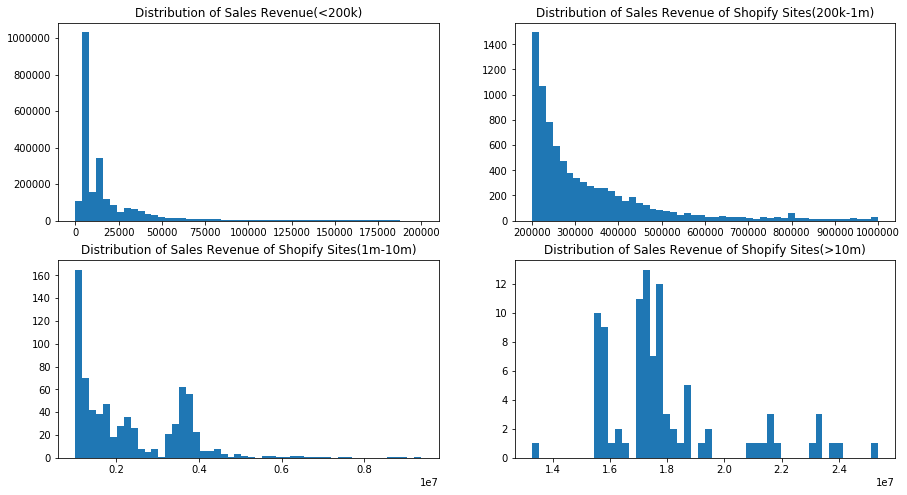

25356346

In [35]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.hist(shopify[shopify['Sales Revenue']<200000]['Sales Revenue'], bins=50)
plt.title('Distribution of Sales Revenue(<200k)',fontsize=12)

plt.subplot(222)
plt.hist(shopify[(shopify['Sales Revenue']>=200000)&(shopify['Sales Revenue']<1000000)]['Sales Revenue'], bins=50)
plt.title('Distribution of Sales Revenue of Shopify Sites(200k-1m)',fontsize=12)

plt.subplot(223)
plt.hist(shopify[(shopify['Sales Revenue']>=1000000)&(shopify['Sales Revenue']<10000000)]['Sales Revenue'], bins=50)
plt.title('Distribution of Sales Revenue of Shopify Sites(1m-10m)',fontsize=12)

plt.subplot(224)
plt.hist(shopify[(shopify['Sales Revenue']>=10000000)]['Sales Revenue'], bins=50)
plt.title('Distribution of Sales Revenue of Shopify Sites(>10m)',fontsize=12)
plt.show()
np.max(shopify[shopify['Sales Revenue']>0]['Sales Revenue'])

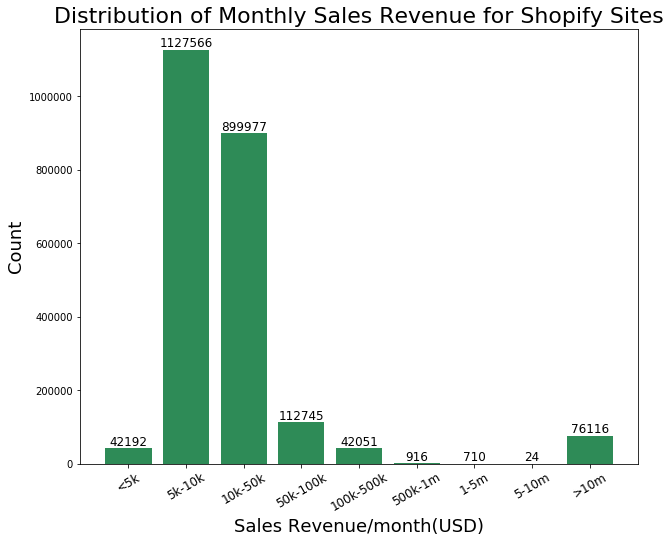

In [36]:
def dist_rev(df, color='seagreen',scale='Shopify Sites'):
#     df['Sales Revenue'] = df['Sales Revenue USD'].apply(int_sales)
#     df['Sales Level'] = df['Sales Revenue'].apply(sales_lv)    
    sales_lv = np.array(['<5k','5k-10k','10k-50k','50k-100k','100k-500k','500k-1m','1-5m','5-10m','>10m'])
    sales_count = np.array([])
    for i in range(9):
        sales_count = np.append(sales_count, len(df[df['Sales Level']==i]))
    #     print(len(shopify[shopify['Sales Level']==i]))
    plt.figure(figsize=(10,8))
    plt.bar(sales_lv, sales_count,fc=color)
    for a,b in zip(sales_lv, sales_count):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
    plt.title('Distribution of Monthly Sales Revenue for %s'%scale,fontsize=22)
    plt.xticks(sales_lv,size='large',rotation=30)
    plt.xlabel('Sales Revenue/month(USD)',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    plt.show()
dist_rev(shopify)

Dive into 10k-100k

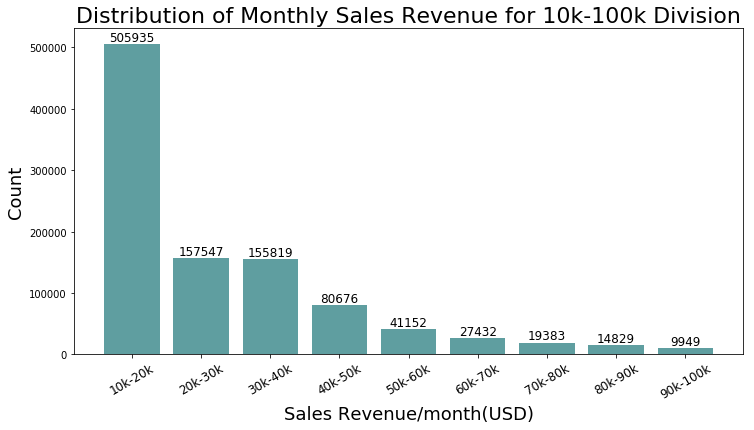

In [37]:
def sales_lv2(s):
    if 10000 < s <= 20000:
        return 0
    elif 20000 < s <= 30000:
        return 1
    elif 30000 < s <= 40000:
        return 2
    elif 40000 < s <= 50000:
        return 3
    elif 50000 < s <= 60000:
        return 4
    elif 60000 < s <= 70000:
        return 5
    elif 70000 < s <= 80000:
        return 6
    elif 80000 < s <= 90000:
        return 7
    elif 90000 < s <= 100000:
        return 8
    else:
        return (-1)

shopify['Sales Level2']=shopify['Sales Revenue'].apply(sales_lv2)

def dist_rev2(df, color='green',scale='Shopify Sites'):
#     df['Sales Revenue'] = df['Sales Revenue USD'].apply(int_sales)
#     df['Sales Level'] = df['Sales Revenue'].apply(sales_lv)    
    sales_lv = np.array(['10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k'])
    sales_count = np.array([])
    for i in range(9):
        sales_count = np.append(sales_count, len(df[df['Sales Level2']==i]))
    #     print(len(shopify[shopify['Sales Level']==i]))
    plt.figure(figsize=(12,6))
    plt.bar(sales_lv, sales_count,fc=color)
    for a,b in zip(sales_lv, sales_count):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
    plt.title('Distribution of Monthly Sales Revenue for %s'%scale,fontsize=22)
    plt.xticks(sales_lv,size='large',rotation=30)
    plt.xlabel('Sales Revenue/month(USD)',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    plt.show()
dist_rev2(shopify,color='cadetblue',scale='10k-100k Division')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


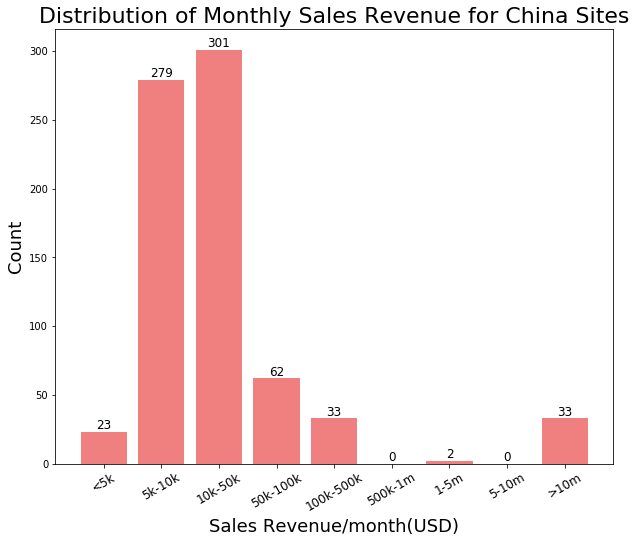

In [41]:
shopify_cn['Sales Revenue'] = shopify_cn['Sales Revenue USD'].apply(int_sales)
shopify_cn['Sales Level'] = shopify_cn['Sales Revenue'].apply(sales_lv)
dist_rev(shopify_cn, 'lightcoral','China Sites')

## Cross Anlaysis for Verticals

In [293]:
shopify_style = shopify[shopify['Vertical']=='Style And Fashion']
shopify_business = shopify[shopify['Vertical']=='Business And Industrial']
shopify_sports = shopify[shopify['Vertical']=='Sports']
shopify_home = shopify[shopify['Vertical']=='Home And Garden']
shopify_tech = shopify[shopify['Vertical']=='Technology And Computing']

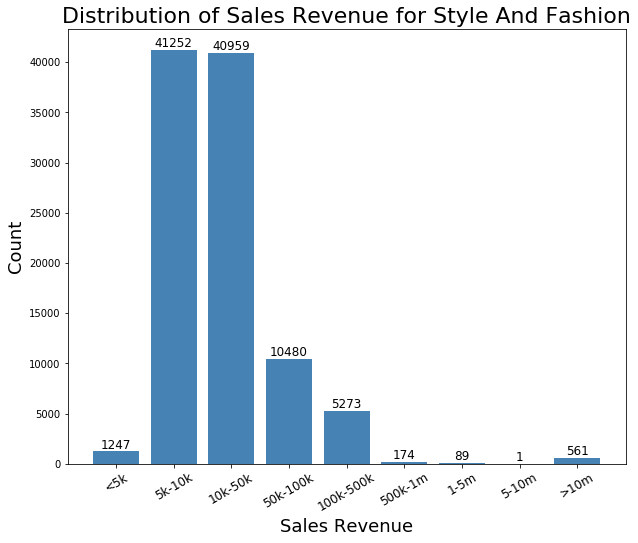

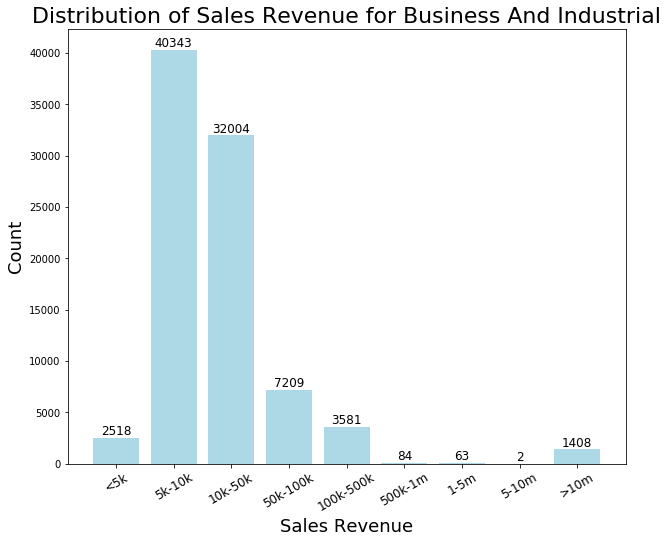

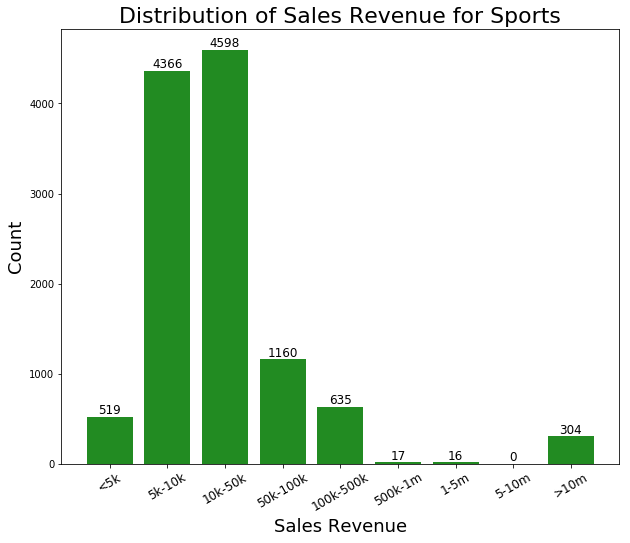

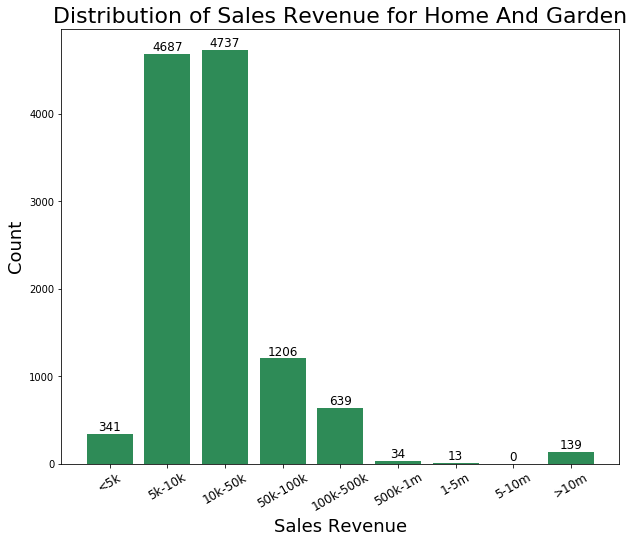

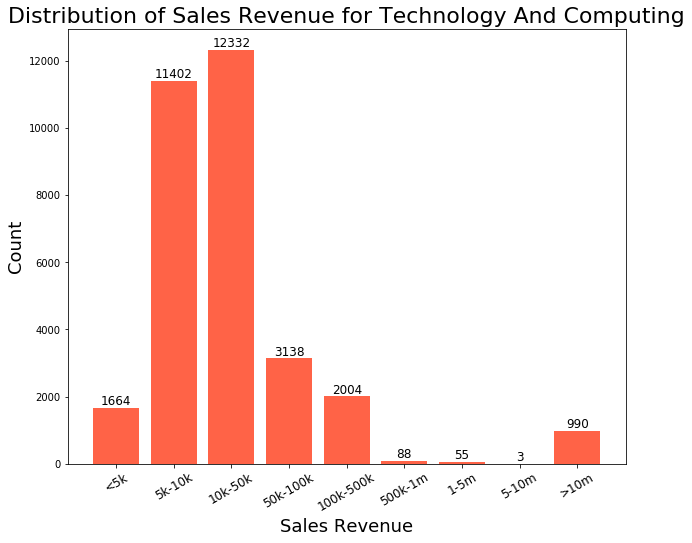

In [294]:
dist_rev(shopify_style, 'steelblue','Style And Fashion')
dist_rev(shopify_business, 'lightblue','Business And Industrial')
dist_rev(shopify_sports, 'forestgreen','Sports')
dist_rev(shopify_home, 'seagreen','Home And Garden')
dist_rev(shopify_tech, 'tomato','Technology And Computing')

# Distribution of Verticals

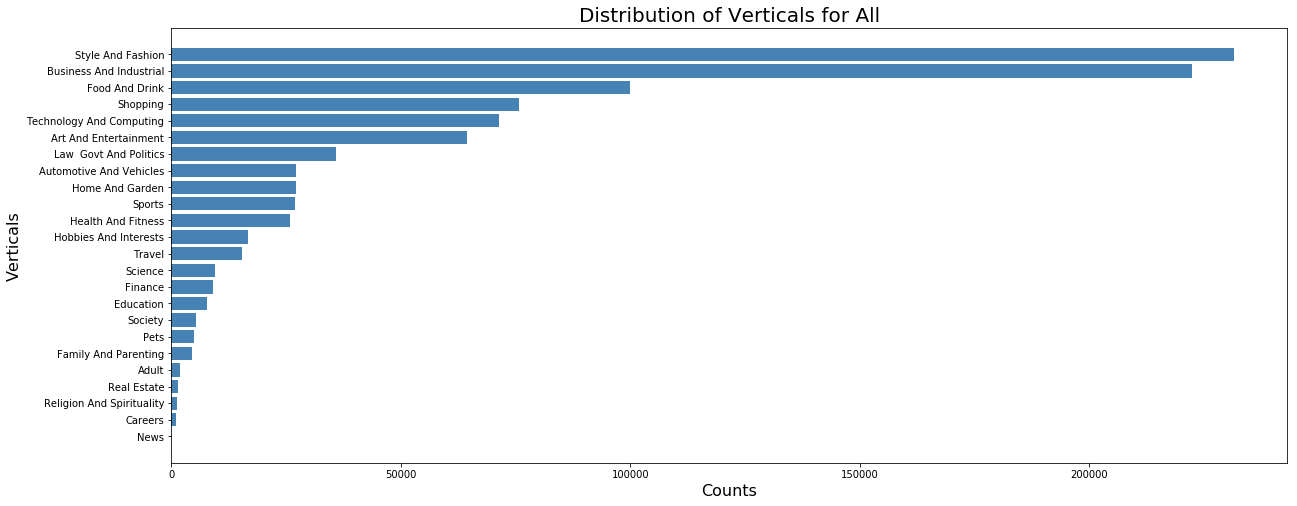

In [38]:
def dist_vtcal(df, color='steelblue', scale='All'):
    vertical_l = []
    vertical_l = list(filter(lambda x: not str(x).isdigit(), df['Vertical'].unique()))
    vertical_l = [x for x in vertical_l if str(x) != 'nan']

    vertical_count = np.array([])
    for v in vertical_l:
        vertical_count = np.append(vertical_count, len(df[df['Vertical']== v]))

    plt.figure(figsize=(20,8))
    vertical_a = np.array(vertical_l)
    plt.barh(vertical_a[np.argsort(vertical_count)], vertical_count[np.argsort(vertical_count)],fc=color)
    plt.title('Distribution of Verticals for %s'%scale, fontsize=20)
    plt.xlabel('Counts',fontsize=16)
    plt.ylabel('Verticals',fontsize=16)
    plt.show()
# print(vertical_l[np.argsort(-vertical_count)])
# vertical_a = np.array(vertical_l)
# vertical_a[np.argsort(-vertical_count)]
# print(vertical_count)
dist_vtcal(shopify)

Distribution of Verticals for China Shopifiers

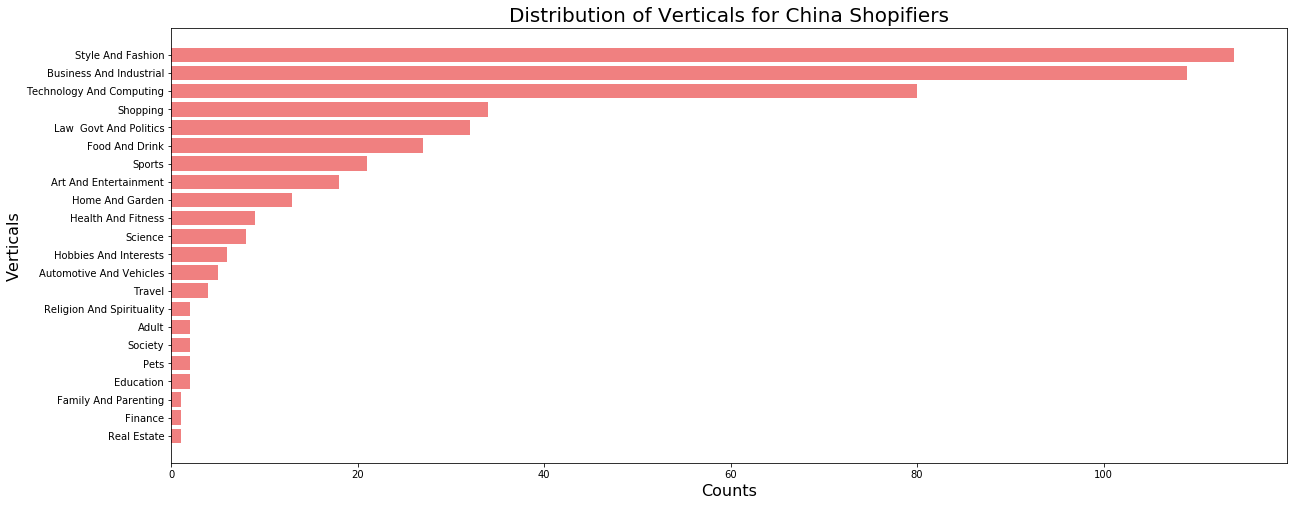

In [42]:
dist_vtcal(shopify_cn,'lightcoral','China Shopifiers')

## Cross Analysis over Sales Revenue

In [43]:
shopify_lv2 = shopify[shopify['Sales Level']==2]
shopify_lv7 = shopify[shopify['Sales Level']==8]

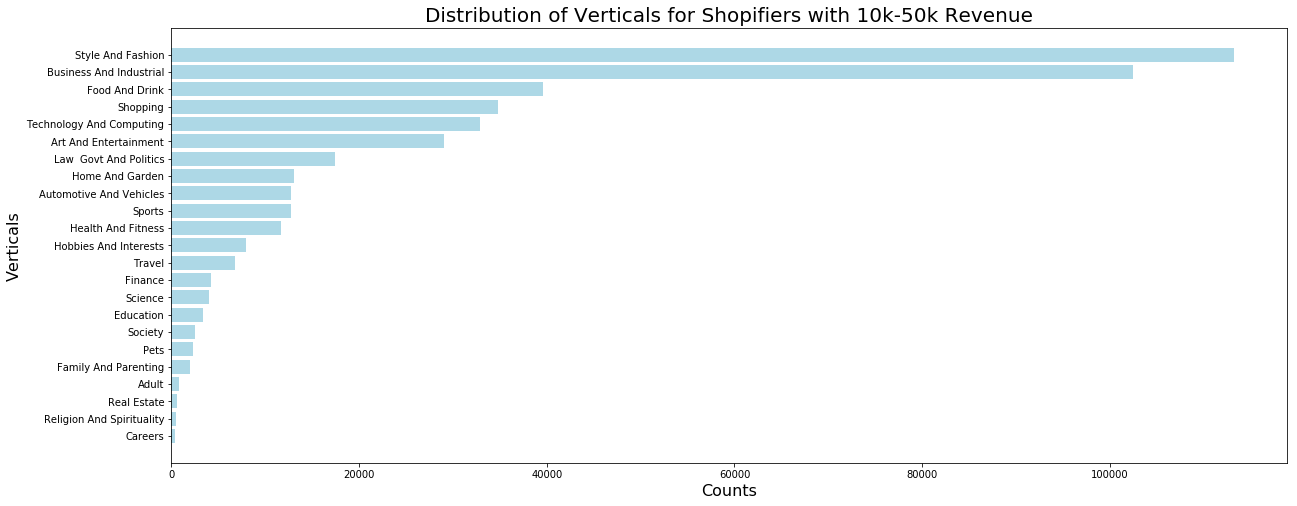

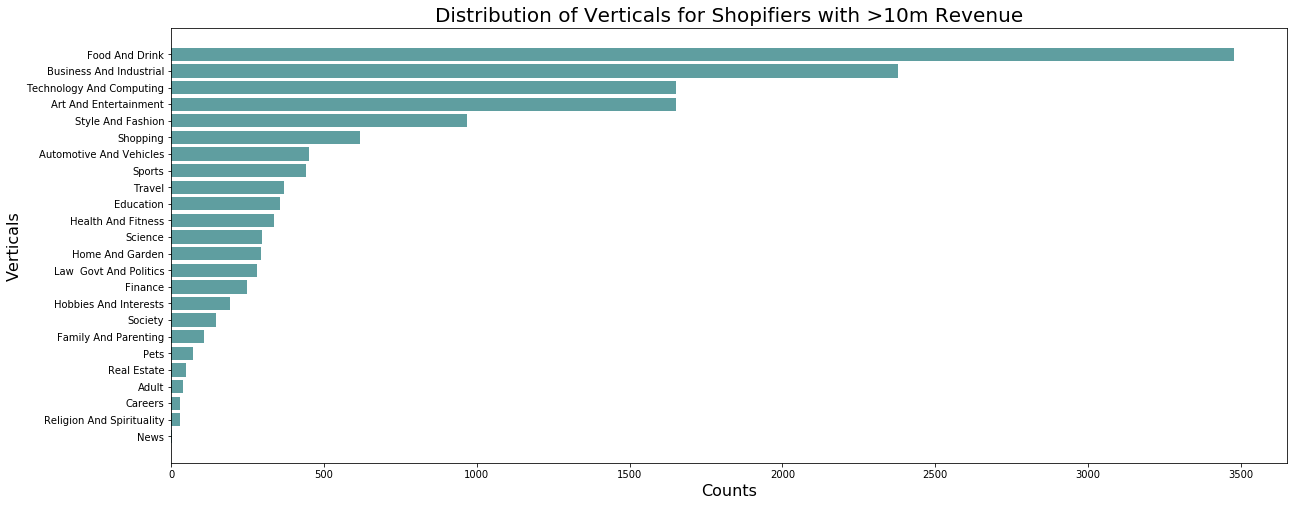

In [44]:
dist_vtcal(shopify_lv2,'lightblue','Shopifiers with 10k-50k Revenue')
dist_vtcal(shopify_lv7,'cadetblue','Shopifiers with >10m Revenue')

In [82]:
len(shopify[shopify['Vertical']=='Business And Industrial'])

87212